# 3.2 Spectral Clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

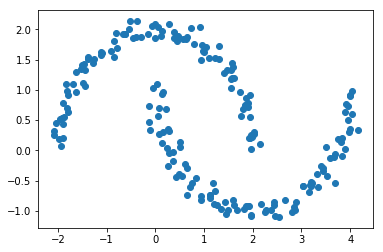

In [3]:
X = np.genfromtxt('../data/data-clustering-2.csv', delimiter=',')
x,y = X
plt.scatter(x,y)

In [7]:
# Applying K-means
k = 2

In [118]:
def spectral_clustering(B):
    # B = beta
    # Creating Similarity Matrix
    dist = cdist(X.T, X.T, metric='euclidean')
    S = np.exp(-B * dist)
    D = np.diag(np.sum(S, axis=0))
    # Laplacian Matrix
    L = D - S
    # Eigen value and eigenvectors
    w,v = np.linalg.eig(L)
    indices = np.argsort(w)
    v = v.T[indices]
    w = np.sort(w)

    u2 = v[1] # Fiedler Vector
    l2 = w[1] # Second Smallest Eigen Value

    # Clusters
    indices_C1 = [np.where(u2 == u)[0][0] for u in u2 if u >= 0]
    C1 = np.array([x[indices_C1],y[indices_C1]])
    indices_C2 = [np.where(u2 == u)[0][0] for u in u2 if u < 0]
    C2 = np.array([x[indices_C2],y[indices_C2]])
    
    return C1, C2

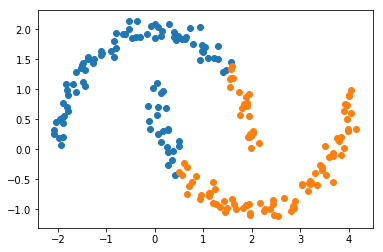

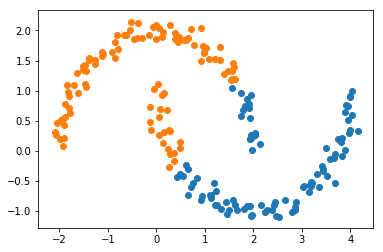

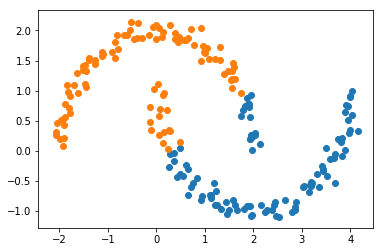

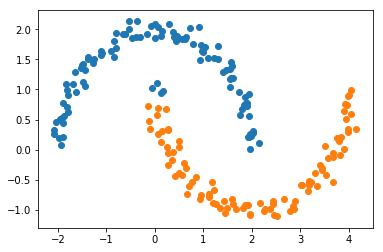

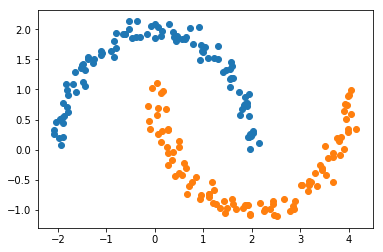

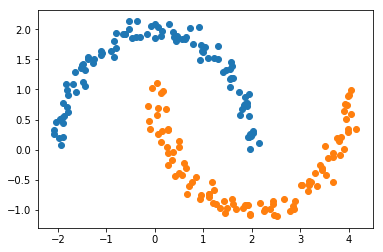

In [120]:
# plotting for different values of beta
for B in [1,2,3,5,7,10]:
    C1, C2 = spectral_clustering(B)

    plt.scatter(C1[0], C1[1])
    plt.scatter(C2[0], C2[1])
    plt.show()

In [99]:
C1.shape
C2.shape

(2, 103)